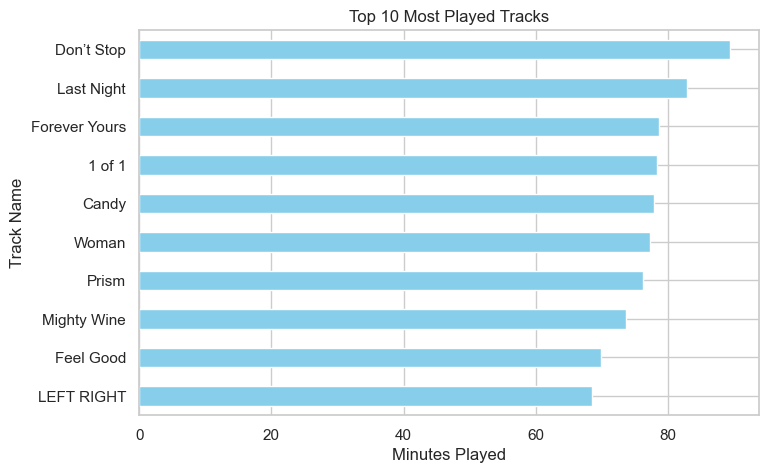

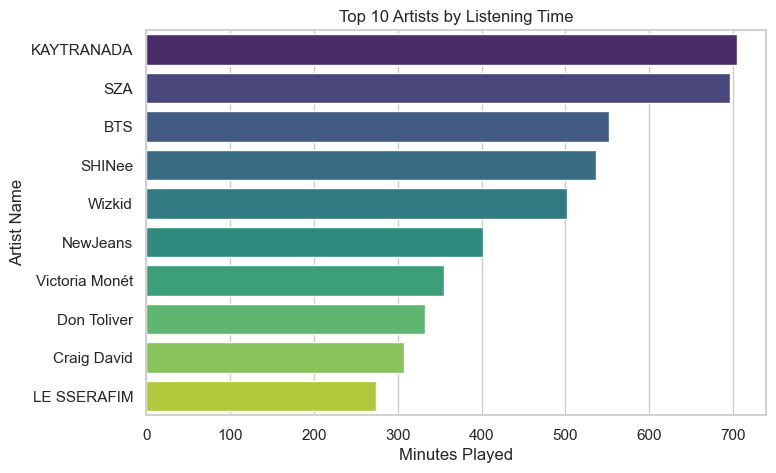

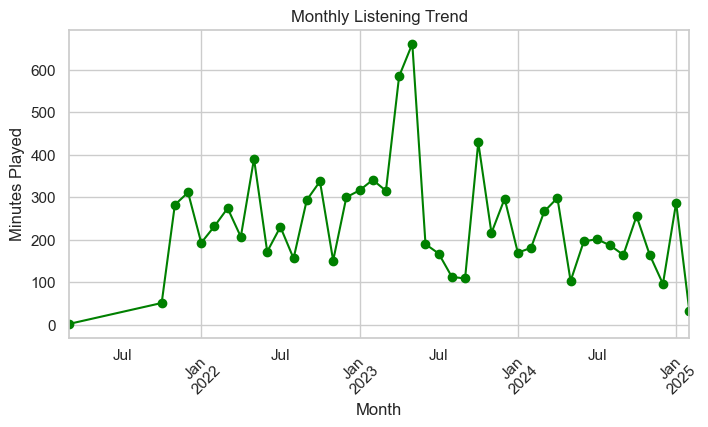

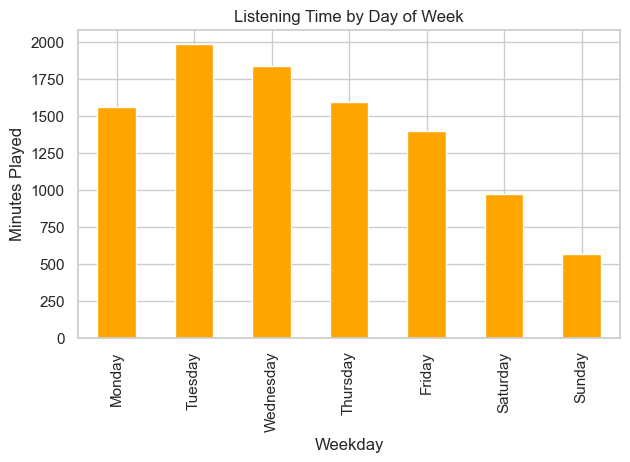

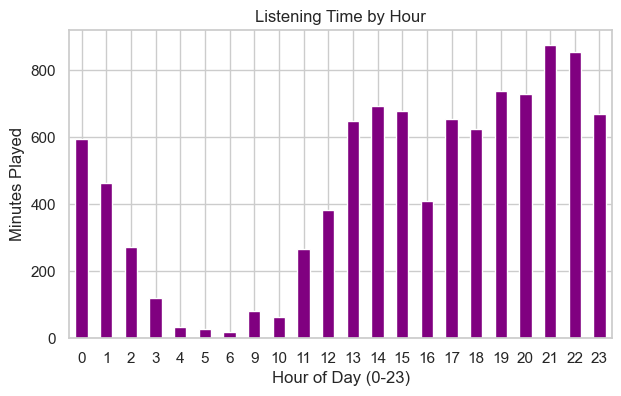

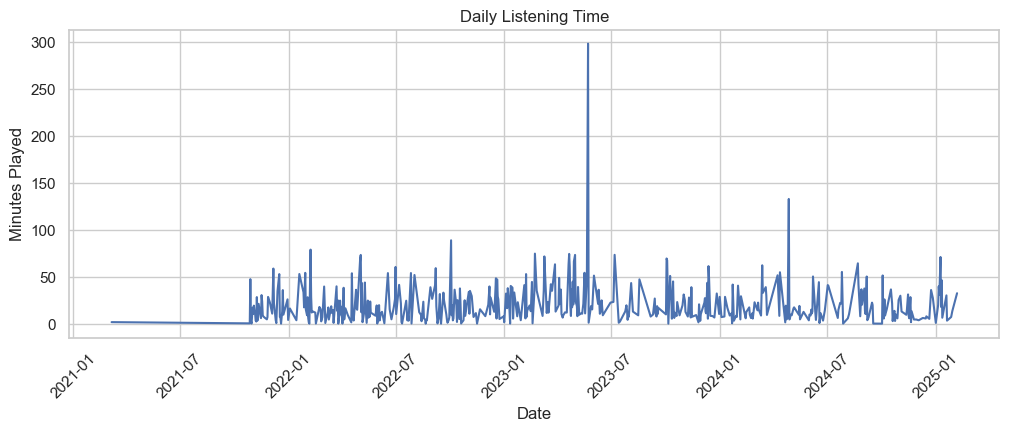

In [1]:
# 📦 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# For showing plots inside the notebook
%matplotlib inline

# Set Seaborn style
sns.set(style='whitegrid')

# 📁 Step 2: Load CSV File
df = pd.read_csv("Spotify_Streaming_History.csv")

# 🧹 Step 3: Clean Column Names and Rename
df.columns = df.columns.str.strip()
df.rename(columns={
    'ts': 'endTime',
    'ms_played': 'msPlayed',
    'master_metadata_album_artist_name': 'artistName',
    'master_metadata_track_name': 'trackName'
}, inplace=True)

# 🕒 Step 4: Convert Datetime and Create Time Features
df['endTime'] = pd.to_datetime(df['endTime'])
df['endTime'] = df['endTime'].dt.tz_localize(None)  # ⚠️ Remove timezone to fix warning
df['date'] = df['endTime'].dt.date
df['month'] = df['endTime'].dt.to_period('M')
df['hour'] = df['endTime'].dt.hour
df['weekday'] = df['endTime'].dt.day_name()

# ⏱️ Step 5: Convert ms to minutes
df['minutesPlayed'] = df['msPlayed'] / (1000 * 60)

# 🎶 Step 6: Top 10 Most Played Tracks
top_tracks = df.groupby('trackName')['minutesPlayed'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
top_tracks.plot(kind='barh', color='skyblue')
plt.title("Top 10 Most Played Tracks")
plt.xlabel("Minutes Played")
plt.ylabel("Track Name")
plt.gca().invert_yaxis()
plt.show()

# 👩‍🎤 Step 7: Top 10 Artists
top_artists_df = df.groupby('artistName')['minutesPlayed'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=top_artists_df, x='minutesPlayed', y='artistName', hue='artistName', palette='viridis', legend=False)  # ✅ Fix warning
plt.title("Top 10 Artists by Listening Time")
plt.xlabel("Minutes Played")
plt.ylabel("Artist Name")
plt.show()

# 📅 Step 8: Monthly Listening Trend
monthly_trend = df.groupby('month')['minutesPlayed'].sum()
monthly_trend.plot(kind='line', marker='o', color='green', figsize=(8,4), title="Monthly Listening Trend")
plt.ylabel("Minutes Played")
plt.xlabel("Month")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 📊 Step 9: Listening by Day of Week
weekday_usage = df.groupby('weekday')['minutesPlayed'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
weekday_usage.plot(kind='bar', color='orange', title="Listening Time by Day of Week", figsize=(7,4))
plt.ylabel("Minutes Played")
plt.xlabel("Weekday")
plt.show()

# ⏰ Step 10: Listening by Hour
hourly_usage = df.groupby('hour')['minutesPlayed'].sum()
hourly_usage.plot(kind='bar', color='purple', figsize=(7,4), title="Listening Time by Hour")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Minutes Played")
plt.xticks(rotation=0)
plt.show()

# 📈 Step 11: Daily Listening Trend
daily_trend = df.groupby('date')['minutesPlayed'].sum()
daily_trend.plot(kind='line', figsize=(12,4), title="Daily Listening Time")
plt.ylabel("Minutes Played")
plt.xlabel("Date")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 💾 Step 12: Save Cleaned Data
df.to_csv("Cleaned_Spotify_Streaming_History.csv", index=False)
